# Fetching dataset

In [5]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')


In [7]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [9]:
x, y = mnist['data'], mnist['target']

In [11]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [15]:
x.shape

(70000, 784)

In [17]:
y.shape

(70000,)

In [19]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

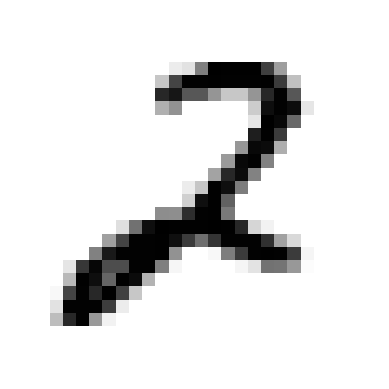

In [23]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

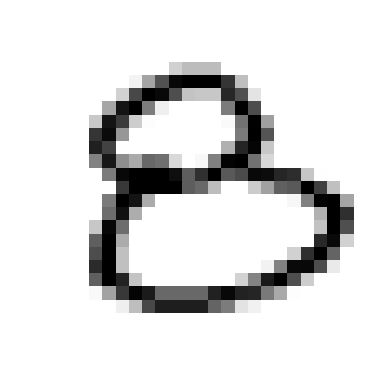

In [27]:
some_digit1 = x.to_numpy()[36008]
some_digit_image1 = some_digit1.reshape(28, 28)
plt.imshow(some_digit_image1, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [47]:
x_train, x_test = x[:60000], x[6000:70000]

In [49]:
y_train, y_test = y[:60000], y[6000:70000]

In [51]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [96]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [98]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2-detector

In [101]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [103]:
y_train_2 = (y_train == 2)
y_train_2

array([False, False, False, ...,  True, False, False])

In [105]:
y_test_2 = (y_test == 2)
y_test_2

6000     False
6001     False
6002     False
6003     False
6004     False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 64000, dtype: bool

# Train a logistic regression classifier

In [108]:
clf = LogisticRegression(tol=0.1)

In [110]:
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [112]:
example = clf.predict([some_digit])
print(example)

[ True]


# Cross Validation

In [117]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.9789833333333334
